In [1]:
import numpy as np
import pandas as pd
import ulmo 
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
data = ulmo.ncdc.ghcn_daily.get_data('USW00093784' , as_dataframe = True) #md science center

/Users/ascott47/anaconda/lib/python3.6/site-packages/ulmo/ncdc/ghcn_daily/core.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)
/Users/ascott47/anaconda/lib/python3.6/site-packages/ulmo/ncdc/ghcn_daily/core.py:95: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  daily_index = element_df.resample('D').index.copy()


In [6]:
data.keys()

dict_keys(['AWND', 'FMTM', 'MDPR', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT03'])

In [8]:
temp = data['TMIN'].value*.1

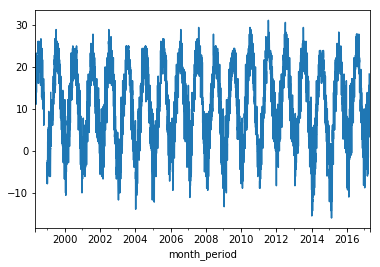

In [28]:
temp.plot()

In [25]:
temp.resample('D', how = 'mean')

/Users/ascott47/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


TypeError: 'str' object is not callable

In [19]:
temp.resample('M').mean#.plot()

<bound method f of PeriodIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]>

In [29]:
560/5.

112.0

In [31]:
1- 1155.08/1400.

0.17494285714285718

In [35]:
# compute relative humidity given water vapor pressure

def q_to_RH(P, T, q) : 
# calculates RH in percentage as a function of: 
# q, pressure in hPa/mbar
# T, temperature in C
# P, pressure in hPa/mbar
# constants from Vaisala http://www.vaisala.com/Vaisala%20Documents/Application%20notes/Humidity_Conversion_Formulas_B210973EN-F.pdf
    A = 6.116441
    T_n = 240.7263
    m = 7.591386
    q_star = A*10**(m*T/(T+T_n))
    
    return 100*q/q_star


In [44]:
q_to_RH(P = 1013, T = 294.2-273.15,q= 1.4)

5.6129275055404575

In [45]:
# water vapor scale = 1
# emissivity = 
1-0.4655

0.5345

In [36]:
q_to_RH(P = 1013, T = 294.2-273.15,q= 14)

56.12927505540458

In [43]:
# water vapor scale = 1
# emissivity = 
1-.2351

0.7649

In [37]:
q_to_RH(P = 1013, T = 294.2-273.15,q= 21)

84.19391258310687

In [40]:
# water vapor scale = 1.5
# emissivity = 
1-0.1527

0.8472999999999999

In [38]:
q_to_RH(P = 1013, T = 294.2-273.15,q= 28)

112.25855011080915

In [39]:
# water vapor scale = 2
# emissivity = 
1-0.0975

0.9025

In [52]:
sigma = 5.671e-8 #W.m-2.K-4
eps_dry = 0.535
eps_wet = 0.85
T_a = 30+273.15

In [53]:
eps_dry*sigma*T_a**4

256.23810838268884

In [54]:
eps_wet*sigma*T_a**4

407.1072750005336

In [ ]:
# from Bateni and Entekhabi
# ds/dt = R_net + H + LE + G
alpha = .3
R_s = 1000
rho = 1.29 #kg/m, Seinfeld and Pandis
cp = 1005 # J/K/kg
ra = 60 # m/s B&E
beta = 0.5 # sample value, B&E, moisture availability
q_star = # B&E, 0.622 es/Pa
T_bar = 
sigma = 5.671e-8 #W.m-2.K-4

# temperature
T_a = 
T_s = 

# humidity
q_a = 14 # mbar specific humidity
q_star = 

# emissivity
epsilon_a = 1-0.2351 # emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 1 http://climatemodels.uchicago.edu/modtran/modtran.html
epsilon_s = .9

R_net = (1-alpha)*R_s + epsilon_a *sigma*T_a**4 - epsilon_s*sigma*T_s**4
H = rho*cp/ra * (T_s - T_a)
LE = -beta*rho*L/ra * (q_star-q_a)
G = -omega(T_s -T_bar)